Importing libraries

In [522]:
import math
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

Unit of measurement

Unit of measurement are kN, m, s.
Therefore, forces are in kN, pressures in KPa, moments in kN x m, time in seconds, distances in metres.
Angles are in 360-degree format in output.

For coordinates of points related to the centre of the circle,\
go to "Origin of coordinates in the centre of the circle"

For coordinates of points related to the left extreme of the circle,\
go to "Change of origins of coordinates\
Origin of coordinates on the left extreme of the circle"

Input section

Circle data input

In [523]:
# Input of arch attributes
rise_int = 1.95
span_length = 6.00
arch_thickness = 0.25
elements = 4

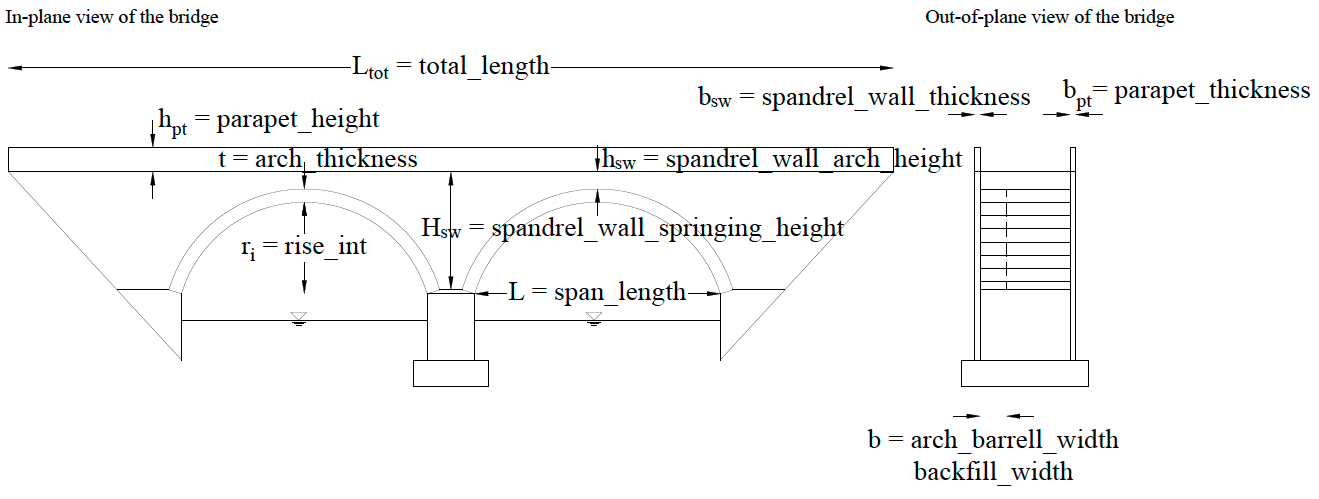

Constitutive law data input

In [524]:
young_modulus = 4.690e6
poisson_coefficient = 0.25
# Eulero-Bernoulli beam model

Failure criteria data input

In [525]:
ultimate_compression_strength = 4.690e3
ultimate_tension_strength = 4.69e2

Calculations of circle attributes

In [526]:
# Arch angle attributes
centre_angle = 4 * math.atan((2 * rise_int)/span_length)
springing_angle = (math.pi - centre_angle)/2

print("centre_angle = ", round(math.degrees(centre_angle),4))
print("springing_angle = ", round(math.degrees(springing_angle),4))

centre_angle =  132.0955
springing_angle =  23.9523


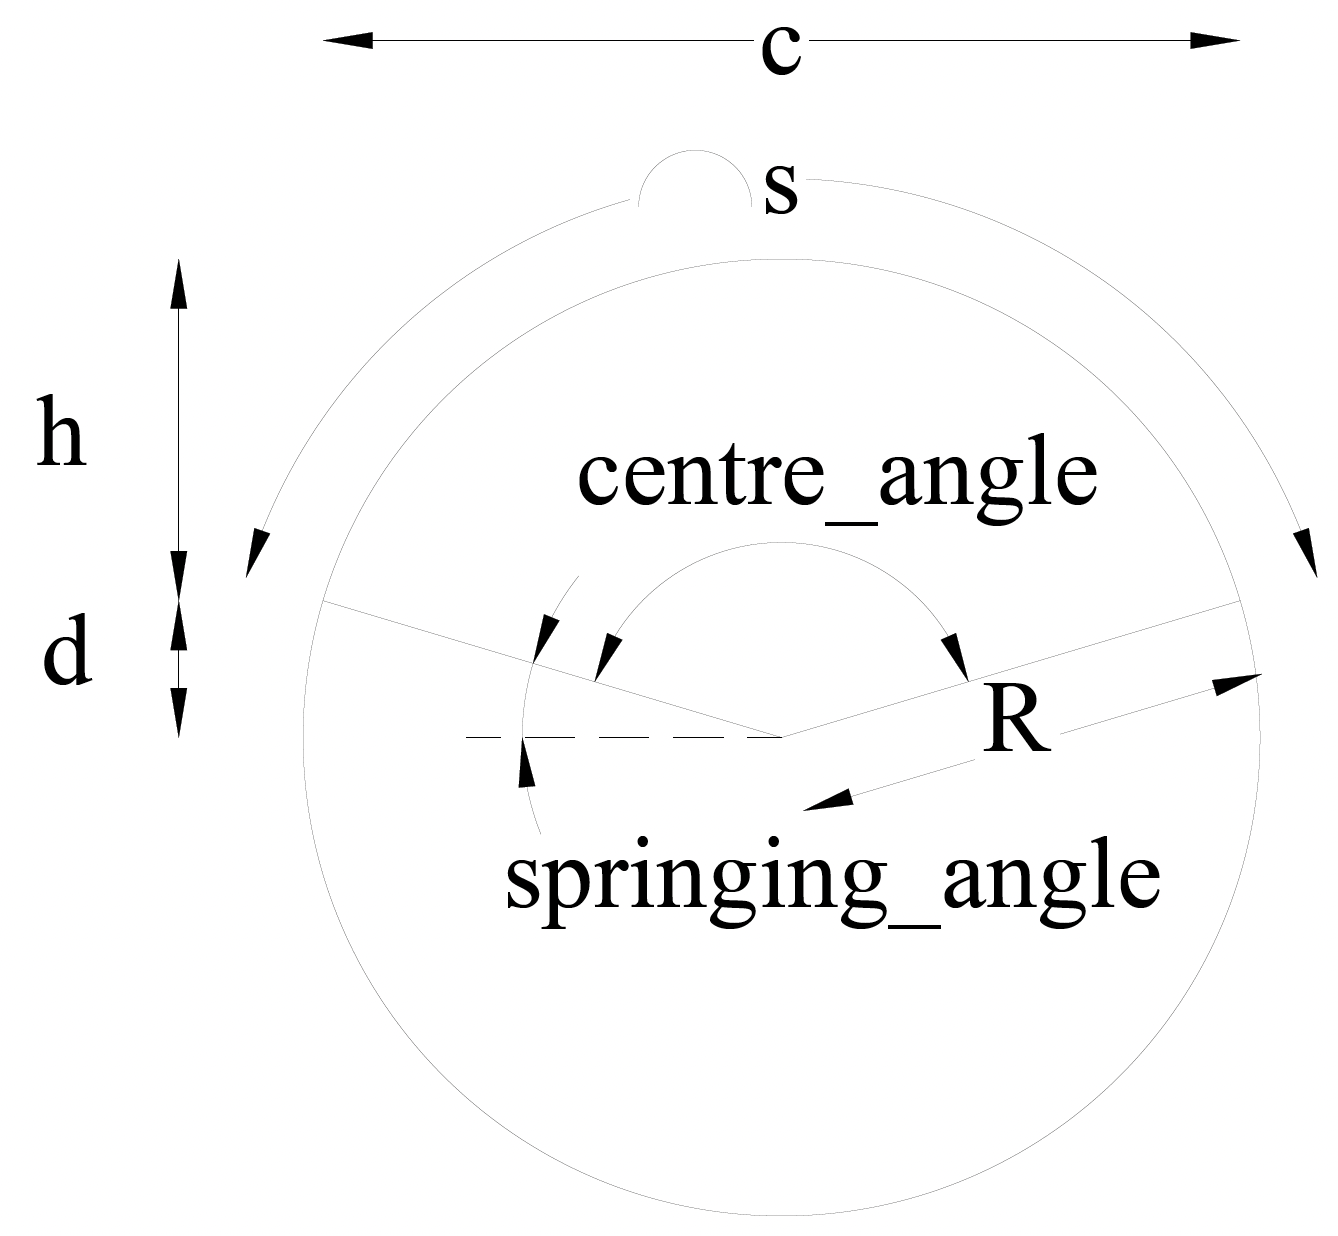

In [527]:
%store springing_angle

Stored 'springing_angle' (float)


In [528]:
# Arch radius attributes
radius_int = span_length/(2*math.cos(springing_angle))
radius_centre = radius_int + arch_thickness/2
radius_ext = radius_int + arch_thickness

print("radius_int = ", round(radius_int,3))
print("radius_centre = ", round(radius_centre,3))
print("radius_ext = ", round(radius_ext,3))

radius_int =  3.283
radius_centre =  3.408
radius_ext =  3.533


In [529]:
# Arch span length attributes
span_length_centre = span_length + 2 * ((arch_thickness/2) * math.cos(springing_angle))
span_length_ext = span_length + 2 * (arch_thickness * math.cos(springing_angle))

print("span_length_centre = ", round(span_length_centre,3))
print("span_length_ext = ", round(span_length_ext,3))

span_length_centre =  6.228
span_length_ext =  6.457


In [530]:
# Arch rise attributes
rise_centre = (span_length_centre/2) * math.tan(centre_angle/4)
rise_ext = (span_length_ext/2) * math.tan(centre_angle/4)

print("rise_centre = ", round(rise_centre,3))
print("rise_ext = ", round(rise_ext,3))

rise_centre =  2.024
rise_ext =  2.099


Geometry for the structural model\
Arch centre-line

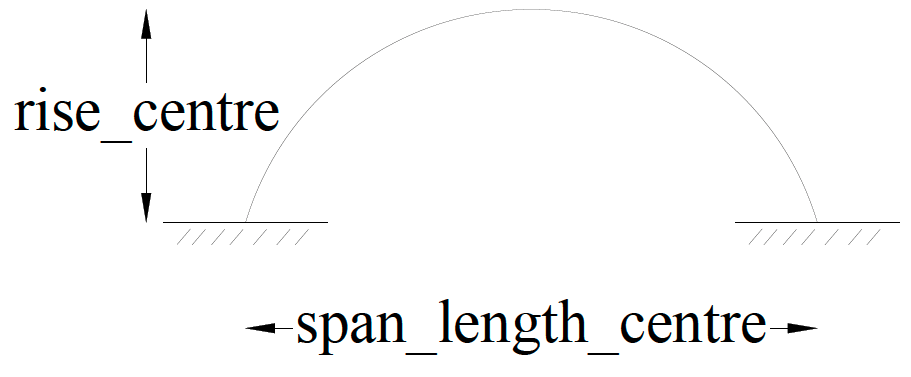

Input of load attributes

In [531]:
# Input of parapet attributes
parapet_thickness = 0.20
parapet_height = 0.90
parapet_unit_weight = 22

In [532]:
# Input of spandrel wall attributes
spandrel_wall_thickness = 0.20
spandrel_wall_arch_height = 0.42
spandrel_wall_unit_weight = 22

spandrel_wall_springing_height = spandrel_wall_arch_height + rise_ext + radius_ext * math.sin(springing_angle)

print("Spandrel wall springing height:", round(spandrel_wall_springing_height, 3))

Spandrel wall springing height: 3.953


In [533]:
# Input of backfill attributes
backfill_width = 1.00
backfill_unit_weight = 19

In [534]:
# Input of arch barrell attributes
arch_barrell_width = 1.00
arch_barrell_height = arch_thickness
arch_barrell_unit_weight = 22

Point coordinates output

Origin of coordinates in the centre of the circle

In [535]:
def divide_half_circle(radius, span_length, elements):

    angle_per_point = centre_angle/elements
    coordinates = []

    for i in range(elements+1):
        current_angle = springing_angle + (i * angle_per_point)
        x_O = round(radius * math.cos(current_angle), 3)
        y_O = round(radius * math.sin(current_angle), 3)
        coordinates.append((i+1, round(math.degrees(current_angle), 4), x_O, y_O))

    for i, coordinate in enumerate(coordinates):
        print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O: ", coordinate[2], "; y_O: ", coordinate[3])
    
    return coordinates

Output variable

In [536]:
point_coordinates = divide_half_circle(radius_centre, span_length_centre, elements)

Point ID:  1 ; Point angle:  23.9523 ; x_O:  3.114 ; y_O:  1.383
Point ID:  2 ; Point angle:  56.9761 ; x_O:  1.857 ; y_O:  2.857
Point ID:  3 ; Point angle:  90.0 ; x_O:  0.0 ; y_O:  3.408
Point ID:  4 ; Point angle:  123.0239 ; x_O:  -1.857 ; y_O:  2.857
Point ID:  5 ; Point angle:  156.0477 ; x_O:  -3.114 ; y_O:  1.383


In [537]:
print(point_coordinates[0]) # to understand data structure

(1, 23.9523, 3.114, 1.383)


In [538]:
def plot_elements_and_half_circle(coordinates, radius, span_length):
    x_points = [coordinate[2] for coordinate in coordinates]
    y_points = [coordinate[3] for coordinate in coordinates]

    springing_angle = math.acos(span_length/(2*radius))
    theta = np.linspace(springing_angle, math.pi - springing_angle, 100)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    
    fig, ax = plt.subplots()
    ax.scatter(x_points, y_points, color = 'red')
    ax.plot(x_circle, y_circle, color = 'blue')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.show()

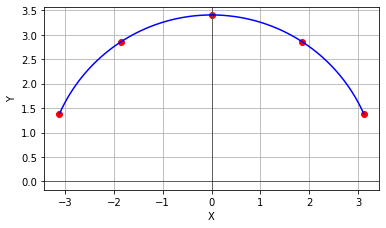

In [539]:
plots = plot_elements_and_half_circle(point_coordinates, radius_centre, span_length_centre)

In [540]:
def export_to_csv(coordinates, filename):
    headers = ['Point ID', 'Point angle', 'X', 'Y']

    current_dir = os.getcwd()
    filepath = os.path.join(current_dir, filename)

    with open(filepath, 'w', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(coordinates)

    print(f"Data has been exported to {filepath} successfully.")

In [541]:
filename = 'circle_points_coordinates.csv'
export_to_csv(point_coordinates, filename)

Data has been exported to /Users/fn20944/Library/CloudStorage/OneDrive-UniversityofBristol/YEAR 3_2022-23/RIVER_SCOUR/panici_bridge_assessment/AFTER-THE-IALCEE-PAPER/circle_points_coordinates.csv successfully.


Change of origins of coordinates\
Origin of coordinates on the left extreme of the circle

In [542]:
def divide_half_circle(radius, span_length, elements):

    angle_per_point = centre_angle/elements
    coordinates = []

    for i in range(elements+1): 
        current_angle = springing_angle + (i * angle_per_point)
        x_O = round(radius * math.cos(springing_angle) - radius * math.cos(current_angle),3)
        y_O = round(radius * math.sin(current_angle), 3)
        coordinates.append((i+1, round(math.degrees(current_angle), 4), x_O, y_O))

    for i, coordinate in enumerate(coordinates):
        print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O: ", coordinate[2], "; y_O: ", coordinate[3])
    
    return coordinates

In [543]:
def plot_elements_and_half_circle(coordinates, radius, span_length):
    x_points = [coordinate[2] for coordinate in coordinates]
    y_points = [coordinate[3] for coordinate in coordinates]

    springing_angle = math.acos(span_length/(2*radius))
    theta = np.linspace(springing_angle, math.pi - springing_angle, 100)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    
    fig, ax = plt.subplots()
    ax.scatter(x_points, y_points, color = 'red')
    ax.plot(x_circle, y_circle, color = 'blue')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axhline(radius * math.sin(springing_angle), color='black', linewidth=1)
    ax.axvline(-radius * math.cos(springing_angle), color='black', linewidth=1)
    plt.grid(True)
    plt.show()

In [544]:
def export_to_csv(coordinates, filename):
    headers = ['Point ID', 'Point angle', 'X', 'Y']

    current_dir = os.getcwd()
    filepath = os.path.join(current_dir, filename)

    with open(filepath, 'w', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(coordinates)

    print(f"Data has been exported to {filepath} successfully.")

In [545]:
point_coordinates_prime = divide_half_circle(radius_centre, span_length_centre, elements)

Point ID:  1 ; Point angle:  23.9523 ; x_O:  0.0 ; y_O:  1.383
Point ID:  2 ; Point angle:  56.9761 ; x_O:  1.257 ; y_O:  2.857
Point ID:  3 ; Point angle:  90.0 ; x_O:  3.114 ; y_O:  3.408
Point ID:  4 ; Point angle:  123.0239 ; x_O:  4.971 ; y_O:  2.857
Point ID:  5 ; Point angle:  156.0477 ; x_O:  6.228 ; y_O:  1.383


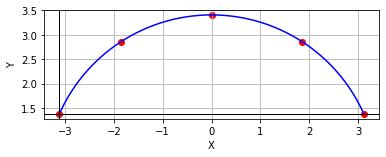

In [546]:
plots = plot_elements_and_half_circle(point_coordinates, radius_centre, span_length_centre)

In [547]:
filename = '/Users/fn20944/Library/CloudStorage/OneDrive-UniversityofBristol/YEAR 3_2022-23/RIVER_SCOUR/open_sees_application/points.csv'
export_to_csv(point_coordinates_prime, filename)

Data has been exported to /Users/fn20944/Library/CloudStorage/OneDrive-UniversityofBristol/YEAR 3_2022-23/RIVER_SCOUR/open_sees_application/points.csv successfully.


Functions of loads

Calculation of nodal loads

Load per unit length

In [548]:
def load_per_length(coordinates, thickness, height, unit_weight):
    load = thickness * height * unit_weight
    return load

In [549]:
def points_distance(coordinates):
    for i, coordinate in enumerate(coordinates):
        if i ==0:
            elements_length = 0
        else:
            elements_length = abs(coordinates[i][2] - coordinates[i-1][2])
        coordinates[i] = coordinate + (elements_length,)
    return coordinates

In [550]:
points_coordinates_prime_distances = points_distance(point_coordinates_prime)

Uniform loads

In [551]:
def calculate_nodal_loads(coordinates, thickness, height, unit_weight, load_name):
    nodal_load_list = []
    target_tuple=[]
    for i, coordinate in enumerate(coordinates):
        load = load_per_length(coordinates, thickness, height, unit_weight)
        if i == 0:
            nodal_load = 1/2 * load * points_coordinates_prime_distances[1][4]
        elif 0 < i < len(coordinates)-1:
            nodal_load =  1/2 * load * (points_coordinates_prime_distances[i][4]+points_coordinates_prime_distances[i+1][4])
        elif i == len(coordinates)-1:
            nodal_load =  1/2 * load * points_coordinates_prime_distances[len(coordinates)-1][4]
        nodal_load_list.append(nodal_load)

        target_tuple = list(points_coordinates_prime_distances[i])
        target_tuple.append(nodal_load_list[i])
        target_tuple = tuple(target_tuple)
        coordinates[i] = target_tuple

    # Print column headers
    headers = ["Point ID", "Point angle", "X", "Y", "Point mutual distance", load_name]
    header_format = "{:<10s} {:<15s} {:<10s} {:<10s} {:<20s} {:<15s}"
    print(header_format.format(*headers))

    # Print coordinate values
    for coordinate in coordinates:
        print("{:<10d} {:<15f} {:<10f} {:<10f} {:<20f} {:<15f}".format(*coordinate))
    
    return coordinates, headers

In [552]:
coordinates_centre = []

nodal_loads_1, headers = calculate_nodal_loads(point_coordinates_prime, parapet_thickness, parapet_height, parapet_unit_weight, "Parapet load")
coordinates_centre.extend(nodal_loads_1)

Point ID   Point angle     X          Y          Point mutual distance Parapet load   
1          23.952300       0.000000   1.383000   0.000000             2.488860       
2          56.976100       1.257000   2.857000   1.257000             6.165720       
3          90.000000       3.114000   3.408000   1.857000             7.353720       
4          123.023900      4.971000   2.857000   1.857000             6.165720       
5          156.047700      6.228000   1.383000   1.257000             2.488860       


In [553]:
nodal_loads_2, headers_2 = calculate_nodal_loads(point_coordinates_prime, arch_barrell_width, arch_barrell_height, arch_barrell_unit_weight, "Arch self-weight")

for i in range(len(coordinates_centre)):
    coordinate_list = list(coordinates_centre[i])
    coordinate_list.append(nodal_loads_2[i][-1])
    coordinates_centre[i] = tuple(coordinate_list)

Point ID   Point angle     X          Y          Point mutual distance Arch self-weight
1          23.952300       0.000000   1.383000   0.000000             2.488860       
2          56.976100       1.257000   2.857000   1.257000             6.165720       
3          90.000000       3.114000   3.408000   1.857000             7.353720       
4          123.023900      4.971000   2.857000   1.857000             6.165720       
5          156.047700      6.228000   1.383000   1.257000             2.488860       


In [554]:
headers.append(headers_2[-1])

Circular loads

In [555]:
point_coordinates_prime_ext = divide_half_circle(radius_ext, span_length_ext, elements)

Point ID:  1 ; Point angle:  23.9523 ; x_O:  0.0 ; y_O:  1.434
Point ID:  2 ; Point angle:  56.9761 ; x_O:  1.303 ; y_O:  2.962
Point ID:  3 ; Point angle:  90.0 ; x_O:  3.228 ; y_O:  3.533
Point ID:  4 ; Point angle:  123.0239 ; x_O:  5.154 ; y_O:  2.962
Point ID:  5 ; Point angle:  156.0477 ; x_O:  6.457 ; y_O:  1.434


In [556]:
def circular_load_height(coordinates_ext, springing_height):
    new_coordinates = []
    height_column = []
    for coordinate in coordinates_ext:
        updated_coordinate = list(coordinate)
        updated_coordinate[3] = springing_height - updated_coordinate[3]
        new_coordinates.append(tuple(updated_coordinate))
        height_column.append(updated_coordinate[3])
    return height_column

In [557]:
def calculate_nodal_loads_circular(coordinates, thickness, height, unit_weight, load_name):
    nodal_load_list = []
    target_tuple=[]
    for i, coordinate in enumerate(coordinates):
        load = load_per_length(coordinates, thickness, height[i], unit_weight)
        if i == 0:
            nodal_load = 1/2 * load * points_coordinates_prime_distances[1][4]
        elif 0 < i < len(coordinates)-1:
            nodal_load =  1/2 * load * (points_coordinates_prime_distances[i][4]+points_coordinates_prime_distances[i+1][4])
        elif i == len(coordinates)-1:
            nodal_load =  1/2 * load * points_coordinates_prime_distances[len(coordinates)-1][4]
        nodal_load_list.append(nodal_load)

        target_tuple = list(points_coordinates_prime_distances[i])
        target_tuple.append(nodal_load_list[i])
        target_tuple = tuple(target_tuple)
        coordinates[i] = target_tuple

    # Print column headers
    headers = ["Point ID", "Point angle", "X", "Y", "Point mutual distance", load_name]
    # header_format = "{:<10s} {:<15s} {:<10s} {:<10s} {:<20s} {:<15s}"
    # print(header_format.format(*headers))

    # Print coordinate values
    # for coordinate in coordinates:
    #     print("{:<10d} {:<15f} {:<10f} {:<10f} {:<20f} {:<15f}".format(*coordinate))
    
    return coordinates, headers

In [558]:
spandrel_wall_height = circular_load_height(point_coordinates_prime_ext, spandrel_wall_springing_height)

In [559]:
nodal_loads_3, headers_3 = calculate_nodal_loads_circular(point_coordinates_prime, spandrel_wall_thickness, spandrel_wall_height, spandrel_wall_unit_weight, "Spandrel wall load")

In [560]:
for i in range(len(coordinates_centre)):
    coordinate_list = list(coordinates_centre[i])
    coordinate_list.append(nodal_loads_3[i][-1])
    coordinates_centre[i] = tuple(coordinate_list)

In [561]:
headers.append(headers_3[-1])

In [562]:
nodal_loads_4, headers_4 = calculate_nodal_loads_circular(point_coordinates_prime, backfill_width, spandrel_wall_height, backfill_unit_weight, "Backfill load")

In [563]:
for i in range(len(coordinates_centre)):
    coordinate_list = list(coordinates_centre[i])
    coordinate_list.append(nodal_loads_3[i][-1])
    coordinates_centre[i] = tuple(coordinate_list)

In [564]:
headers.append(headers_4[-1])

In [565]:
# Print column headers
header_format = "{:<10s} {:<15s} {:<10s} {:<10s} {:<20s} {:<15s} {:<15s} {:<15s} {:<15s}"
print(header_format.format(*headers))

# Print coordinate values
for coordinate in coordinates_centre:
    print("{:<10d} {:<15f} {:<10f} {:<10f} {:<20f} {:<15f} {:<15f} {:<15f} {:<15f}".format(*coordinate))

Point ID   Point angle     X          Y          Point mutual distance Parapet load    Arch self-weight Spandrel wall load Backfill load  
1          23.952300       0.000000   1.383000   0.000000             2.488860        3.456750        6.965192        30.076964      
2          56.976100       1.257000   2.857000   1.257000             6.165720        8.563500        6.787035        29.307651      
3          90.000000       3.114000   3.408000   1.857000             7.353720        10.213500       3.429222        14.808004      
4          123.023900      4.971000   2.857000   1.857000             6.165720        8.563500        6.787035        29.307651      
5          156.047700      6.228000   1.383000   1.257000             2.488860        3.456750        6.965192        30.076964      


In [566]:
coordinates_centre[0]

(1,
 23.9523,
 0.0,
 1.383,
 0,
 2.48886,
 3.4567499999999995,
 6.965191707692308,
 30.076964192307692)

In [567]:
def export_coordinates_to_csv(coordinates, headers, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(headers)  # Write the column headers
        writer.writerows(coordinates)  # Write the coordinate values

In [568]:
export_coordinates_to_csv(coordinates_centre, headers, 'points_coordinates_nodal_loads_all.csv')